# Lending Club Case Study

# Business Understanding
Assume, We are working for a consumer finance company which specialises in lending various types of loans to urban customers. 
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 
Two types of risks are associated with the bank’s decision:
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

# Objective
Company wants to understand the driving factors (or driver variables) behind loan default (loan_status = 'Charged Off' in the loan data set), i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read the dataset and check the first five rows
loan = pd.read_csv('loan.csv',dtype='unicode')
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [4]:
#Check the shape of data set
print(f'Total rows in original loan data set: {loan.shape[0]}')
print(f'Total columns in original loan data set: {loan.shape[1]}')

Total rows in original loan data set: 39717
Total columns in original loan data set: 111


# Data Cleaning 

In [5]:
#Check rows which has missing values for all columns 
print(f'Total empty Rows: {loan.isnull().all(axis=1).sum()}')
#Observation - There's no empty row in the entire data set

Total empty Rows: 0


In [6]:
#Check columns with all missing values
print(f'Total empty Columns: {loan.isnull().all(axis=0).sum()}') #Observation - There's no empty row in the entire data set
#Observation - There's are 54 columns with all missing values

Total empty Columns: 54


# Drop columns which has all null values

In [7]:
#Dropping columns which has all null values
loan.dropna(axis = 1, how = 'all', inplace = True)
print(f'Total columns after dropping null columns: {loan.shape[1]}')
loan.head(5)

Total columns after dropping null columns: 57


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [8]:
#Check for duplicate rows 
duplicate = loan[loan.duplicated()]
print('Duplicate Rows :')
duplicate

#Observation - There're no duplicate rows in the dataset

Duplicate Rows :


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [9]:
# Lets find Which columns have null values
loan.isnull().sum().sort_values(ascending=0)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [10]:
# Get the num values count for columns in percentage
print((loan.isnull().sum()/loan.shape[0]*100).round(2).sort_values(ascending=False))

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
int_rate                       0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
term                           0.00
last_pymnt_amnt                0.00
initial_list_status            0.00
funded_amnt_inv             

We can drop all those columns which has more than 30% of null values to ensure it doesn't impact analysis
next_pymnt_d, mths_since_last_record, mths_since_last_delinq, desc - Let's drop these column

In [11]:
columns_drop_list = ["next_pymnt_d","mths_since_last_record","mths_since_last_delinq","desc"]
loan.drop(labels=columns_drop_list, axis=1 , inplace=True)
print(f'Total columns now: {loan.shape[1]}')
# Lets do the null check again for columns
loan.isnull().sum().sort_values(ascending=0)


Total columns now: 53


emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
out_prncp                        0
initial_list_status              0
out_prncp_inv                    0
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                  

In [12]:
# data types for all columns is object, now let's check columns which has single value
#loan.dtypes
for i in loan.columns[loan.dtypes == 'object']:
    print('********** Column **************')
    print(loan[i].value_counts())
    print('************************')
    
#Observation -  Let's remove single valued column as it will not help in analysis
    

********** Column **************
id
1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: count, Length: 39717, dtype: int64
************************
********** Column **************
member_id
1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: count, Length: 39717, dtype: int64
************************
********** Column **************
loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64
************************
********** Column **************
funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: count, Length: 1041, dtype: int64
***

total_pymnt
11196.56943    26
0              16
11784.23223    16
10956.77596    16
5478.387981    15
               ..
17768.43001     1
12794.80658     1
6193.803706     1
34797.76917     1
9195.263334     1
Name: count, Length: 37850, dtype: int64
************************
********** Column **************
total_pymnt_inv
0           165
6514.52      16
5478.39      14
13148.14     14
11196.57     12
           ... 
17702.5       1
19026.06      1
7355.24       1
387.55        1
980.83        1
Name: count, Length: 37518, dtype: int64
************************
********** Column **************
total_rec_prncp
10000       2293
12000       1805
5000        1702
6000        1637
15000       1400
            ... 
1097.81        1
1410.3         1
6968.65        1
3477.49        1
16077.42       1
Name: count, Length: 7976, dtype: int64
************************
********** Column **************
total_rec_int
0          71
1196.57    26
514.52     19
956.78     17
1784.23    17
           ..
4

In [13]:
print(f'Total columns before: {loan.shape[1]}')
single_val_cols = ["initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"]
print(f'Total single valued columns in data set {len(single_val_cols)}')
loan.drop(labels=single_val_cols, axis=1 , inplace=True)
print(f'Total columns now: {loan.shape[1]}')

Total columns before: 53
Total single valued columns in data set 8
Total columns now: 45


In [14]:
#Now, Let's drop irrelavant columns which will not be helpful in analysis like member_id, url and zip_code (masked)
irrelevant_cols = ["member_id","url","zip_code"]
loan.drop(labels=irrelevant_cols, axis=1 , inplace=True)
#We can also drop title,emp_title and desc columns as it contains random values, amd will not add value in analysis
random_val_cols = ["title","emp_title"]
loan.drop(labels=random_val_cols, axis=1 , inplace=True)
# Drop funded_amnt_inv, it's internal data and is calculated after loan approval, so can't use as input for analysis
loan=loan.drop(["funded_amnt_inv"],axis=1)

In [15]:
# Check for missing values across the rows
print((loan.isnull().sum(axis=1)).max())
#Observation - Missing value count is quite low compare to the the total cols count, so can ignore this

2


In [16]:
# Check for missing values in columns
loan.isna().sum().sort_values()
#Observation - Missing value count in columns us less than 3%, we can ignore it

id                            0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
inq_last_6mths                0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
total_pymnt_inv               0
delinq_2yrs                   0
earliest_cr_line              0
addr_state                    0
funded_amnt                   0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
dti                           0
home_ownership                0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose 

# Data type Conversion and formating
int_rate: Convert to float - as it's numerical value
term: Convert to integer - as it's numerical value.

Removed '%' from int_rate values.
Stripped leading spaces and removed ' months' from term values.

In [17]:
#loan.dtypes
# Convert int_rate to float after removing the '%' sign
loan.int_rate = loan.int_rate.str.rstrip('%').astype(float)

# Strip leading spaces and convert term to integer
loan.term = loan.term.str.strip().str.replace(' months', '').astype(int)

# Handling data types
Converting the Quantitative variables to numeric types

In [18]:
loan.dtypes
print(loan.dtypes)
# List of numerical columns
loan.loan_amnt = loan.loan_amnt.astype(int)
loan.funded_amnt = loan.funded_amnt.astype(int)
loan.installment = loan.installment.astype(float)
loan.dti = loan.dti.astype(float)
loan.total_rec_late_fee = loan.total_rec_late_fee.astype(float)
loan.pub_rec_bankruptcies = loan.pub_rec_bankruptcies.astype(int)
loan.pub_rec = loan.pub_rec.astype(int)
loan.open_acc = loan.open_acc.astype(int)
loan.total_acc = loan.total_acc.astype(int)
loan.delinq_2yrs = loan.delinq_2yrs.astype(int)

id                          object
loan_amnt                   object
funded_amnt                 object
term                         int64
int_rate                   float64
installment                 object
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                  object
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
addr_state                  object
dti                         object
delinq_2yrs                 object
earliest_cr_line            object
inq_last_6mths              object
open_acc                    object
pub_rec                     object
revol_bal                   object
revol_util                  object
total_acc                   object
out_prncp                   object
out_prncp_inv               object
total_pymnt         

ValueError: cannot convert float NaN to integer

# Outlier analysis
Outlier analysis is done on numerical column to identify extreme values that can impact the analysis.

In [ ]:
# Generate box plot to identify outliers in annual_inc
loan.annual_inc = loan.annual_inc.astype(float)
sns.boxplot(loan['annual_inc'])
plt.show()

#Observation -
#Below box plots clearly indicates presence of outliers.

# Removing outliers
Let's see the quantile info first and see the change in values.
The values after 95 percentile looks disconected from the general distribution and also there is huge increase in the value for small quantile variation.
So, let's consider threshold for removing outliers as 0.95

In [19]:
#loan.dtypes
loan.annual_inc.quantile([0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,.95,0.96,0.97,0.98,.99,1])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
#Remove the annual_inc data after 95 percentile
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= per_95_annual_inc]

<Axes: >

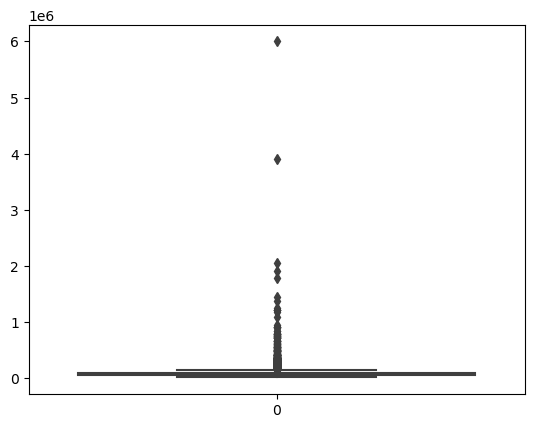

In [20]:
sns.boxplot(loan.annual_inc)

#Now the "annual_inc" data looks good and proceeding next.
Let's analyze other numerical variables which could possibly have outliers.
dti
loan_amnt
funded_amnt_inv

<Axes: >

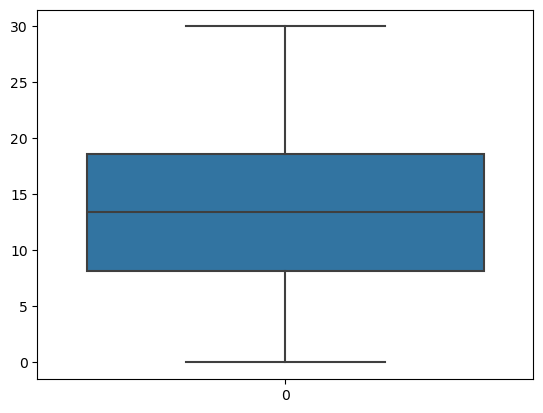

In [21]:
#Checking outliers for dti
sns.boxplot(loan.dti)
#Observation - Doesn't exist

<Axes: >

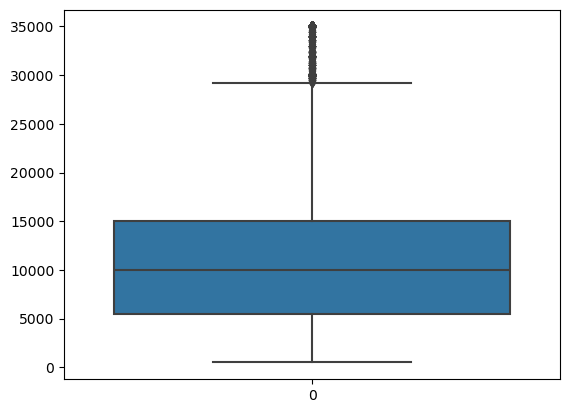

In [22]:
#Checking outliers for loan_amnt
sns.boxplot(loan.loan_amnt)

# Univariate Analysis 
Let's start with Univariate Analysis. We will do it first on unordered categorical variables.
We will do this anlysis only on those columns, where it makes sense and will help in analysis

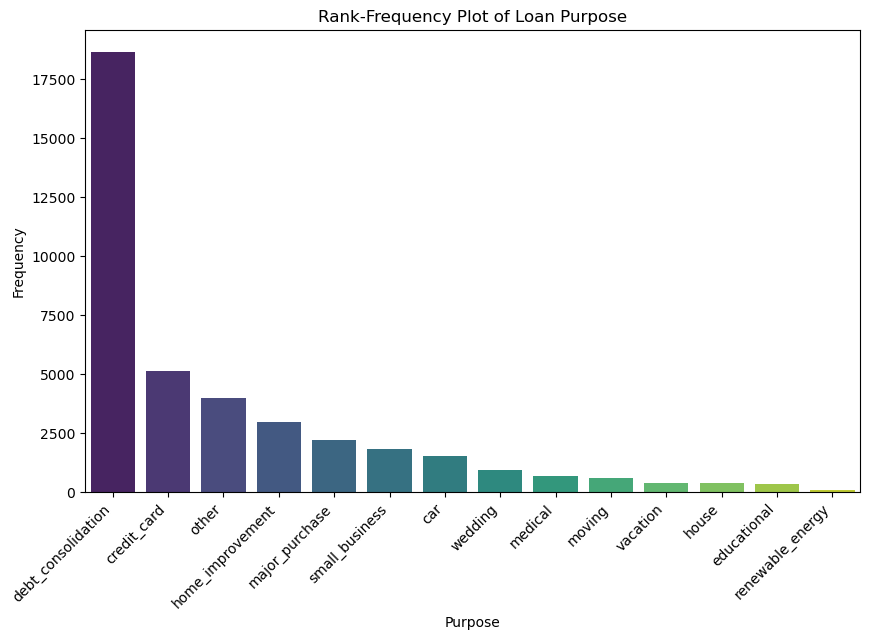

In [23]:
# Calculate the frequency of each category in purpose
purpose_counts = loan['purpose'].value_counts()

# Generate the rank-frequency plot
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='viridis')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Rank-Frequency Plot of Loan Purpose')
plt.xticks(rotation=45, ha='right') 
plt.show()

# Observation -
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.

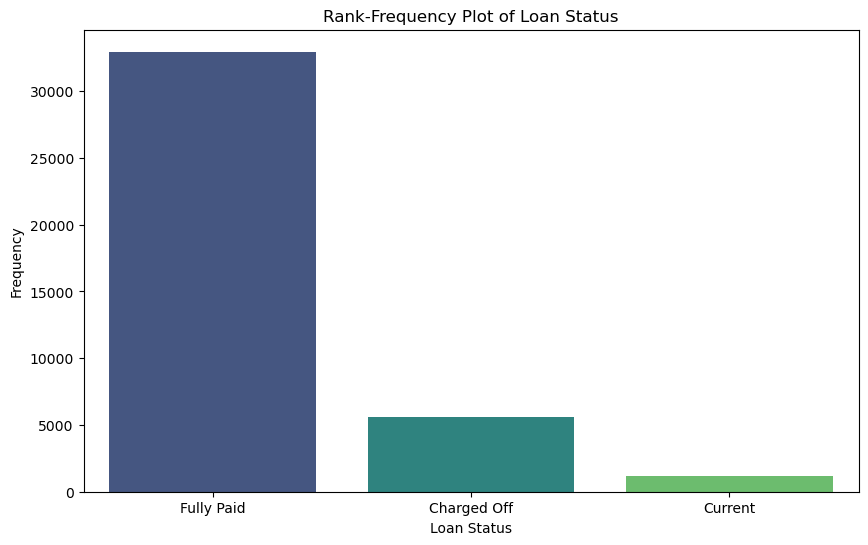

In [24]:
# Calculate the frequency of each category in loan_status
loan_status_counts = loan['loan_status'].value_counts()

# Generate the rank-frequency plot
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Rank-Frequency Plot of Loan Status')
plt.show()

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

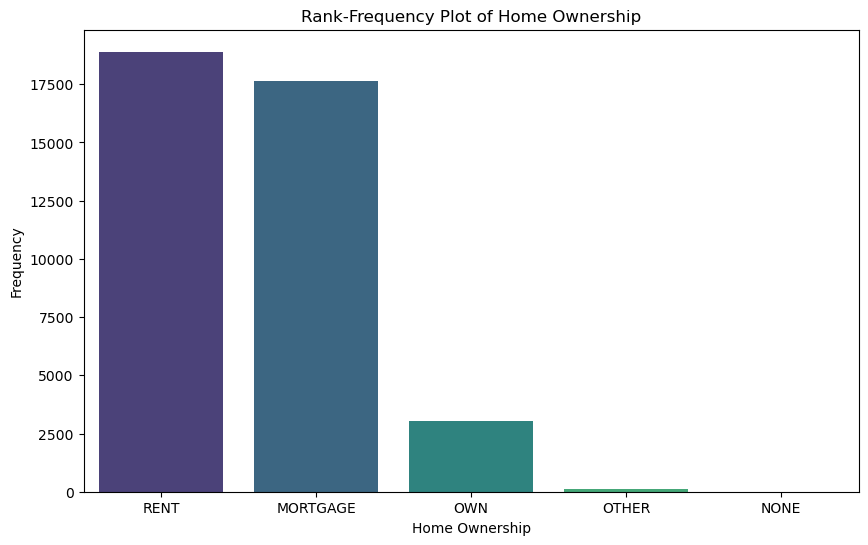

In [25]:
# Calculate the frequency of each category in home_ownership
home_ownership_counts = loan['home_ownership'].value_counts()

# Generate the rank-frequency plot
plt.figure(figsize=(10, 6))
sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values, palette='viridis')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.title('Rank-Frequency Plot of Home Ownership')
plt.show()

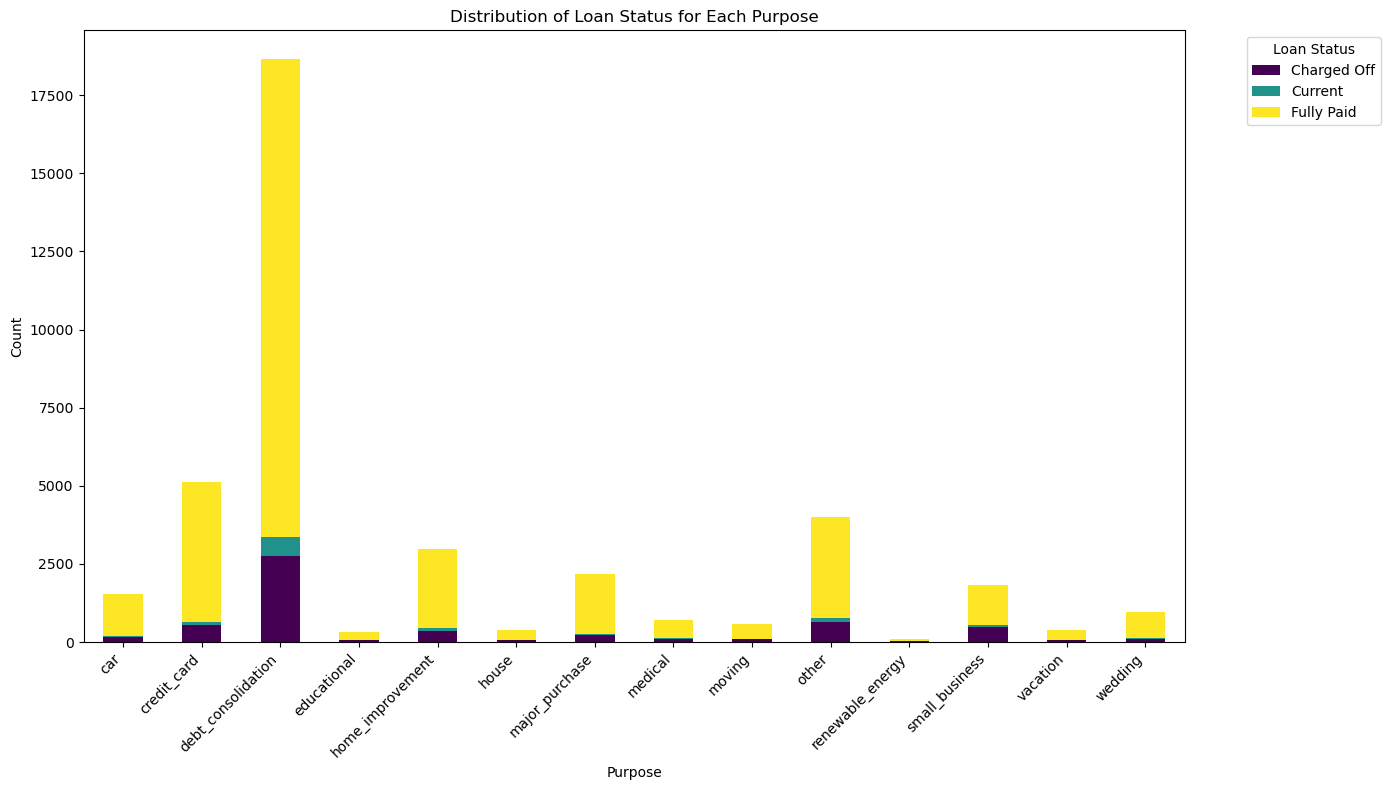

In [26]:
#Distribution of loan_status for each purpose, providing a clear visualization of how loan status varies across different purposes.

# Create a crosstab to get counts of loan_status for each purpose
crosstab = pd.crosstab(loan['purpose'], loan['loan_status'])

# Plot the stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Distribution of Loan Status for Each Purpose')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Observations - 
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.


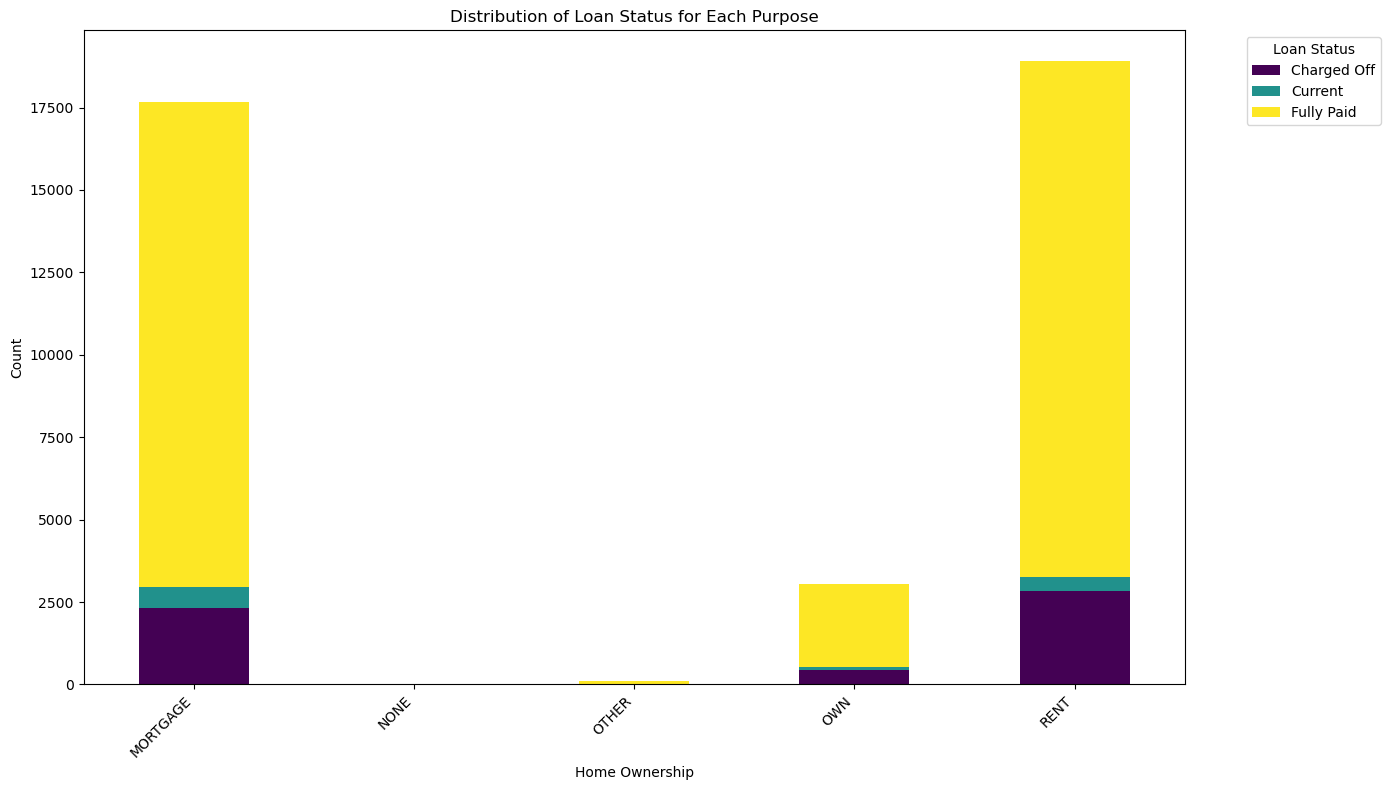

In [27]:
#Distribution of home_ownership for each loan status, providing a clear visualization of how loan status varies across different home ownership.

# Create a crosstab to get counts of loan_status for each purpose
crosstab = pd.crosstab(loan['home_ownership'], loan['loan_status'])

# Plot the stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Loan Status for Each Purpose')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Observations - 
#Most of the loan applications are from people who are on rent or on Mortgage, as majority of applications are from these categories, we see charged off is high too


In [28]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head(1)

# Observations
# Two new columns month and year were derived from issue date

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,36,10.65,162.87,B,B2,10+ years,RENT,...,863.16,0.0,0,0,Jan-15,171.62,May-16,0,2011,12


# Univariate Analysis - Ordered categorical variables



<Figure size 1400x800 with 0 Axes>

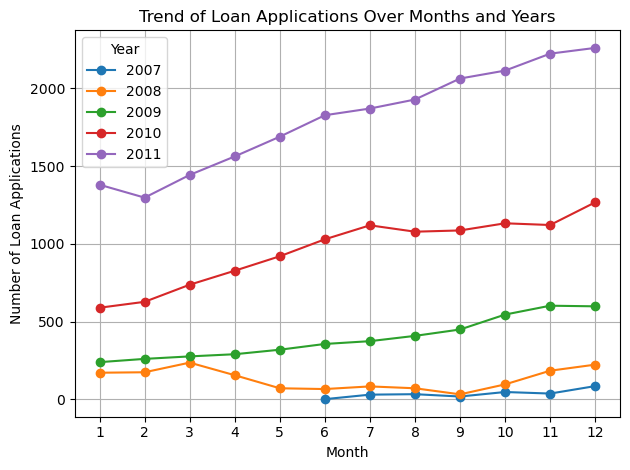

In [29]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
# Group by year and month, then count the number of loan applications
loan_trend = loan.groupby(['year', 'month']).size().reset_index(name='loan_count')

# Pivot the data to make it suitable for plotting
loan_trend_pivot = loan_trend.pivot(index='month', columns='year', values='loan_count')

# Plot the trend
plt.figure(figsize=(14, 8))
loan_trend_pivot.plot(kind='line', marker='o')
plt.title('Trend of Loan Applications Over Months and Years')
plt.xlabel('Month')
plt.ylabel('Number of Loan Applications')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to number of charged off applications.
# number of loans issued in 2008( May-October) got dipped, may be due to Recession.

# Univariate Analysis - Numerical variables
Step-by-Step Process:
Summary Statistics: Calculate summary statistics (mean, median, standard deviation, etc.) for each numerical variable.
Visualizations: Create histograms, box plots, and density plots for each numerical variable.

In [30]:
# List of numerical columns
numerical_columns = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

# Summary Statistics
summary_statistics = loan[numerical_columns].describe()

# Display summary statistics
print("Summary Statistics:\n", summary_statistics)




Summary Statistics:
           loan_amnt   funded_amnt      int_rate   installment           dti
count  39717.000000  39717.000000  39717.000000  39717.000000  39717.000000
mean   11219.443815  10947.713196     12.021177    324.561922     13.315130
std     7456.670694   7187.238670      3.724825    208.874874      6.678594
min      500.000000    500.000000      5.420000     15.690000      0.000000
25%     5500.000000   5400.000000      9.250000    167.020000      8.170000
50%    10000.000000   9600.000000     11.860000    280.220000     13.400000
75%    15000.000000  15000.000000     14.590000    430.780000     18.600000
max    35000.000000  35000.000000     24.590000   1305.190000     29.990000


TypeError: Horizontal orientation requires numeric `x` variable.

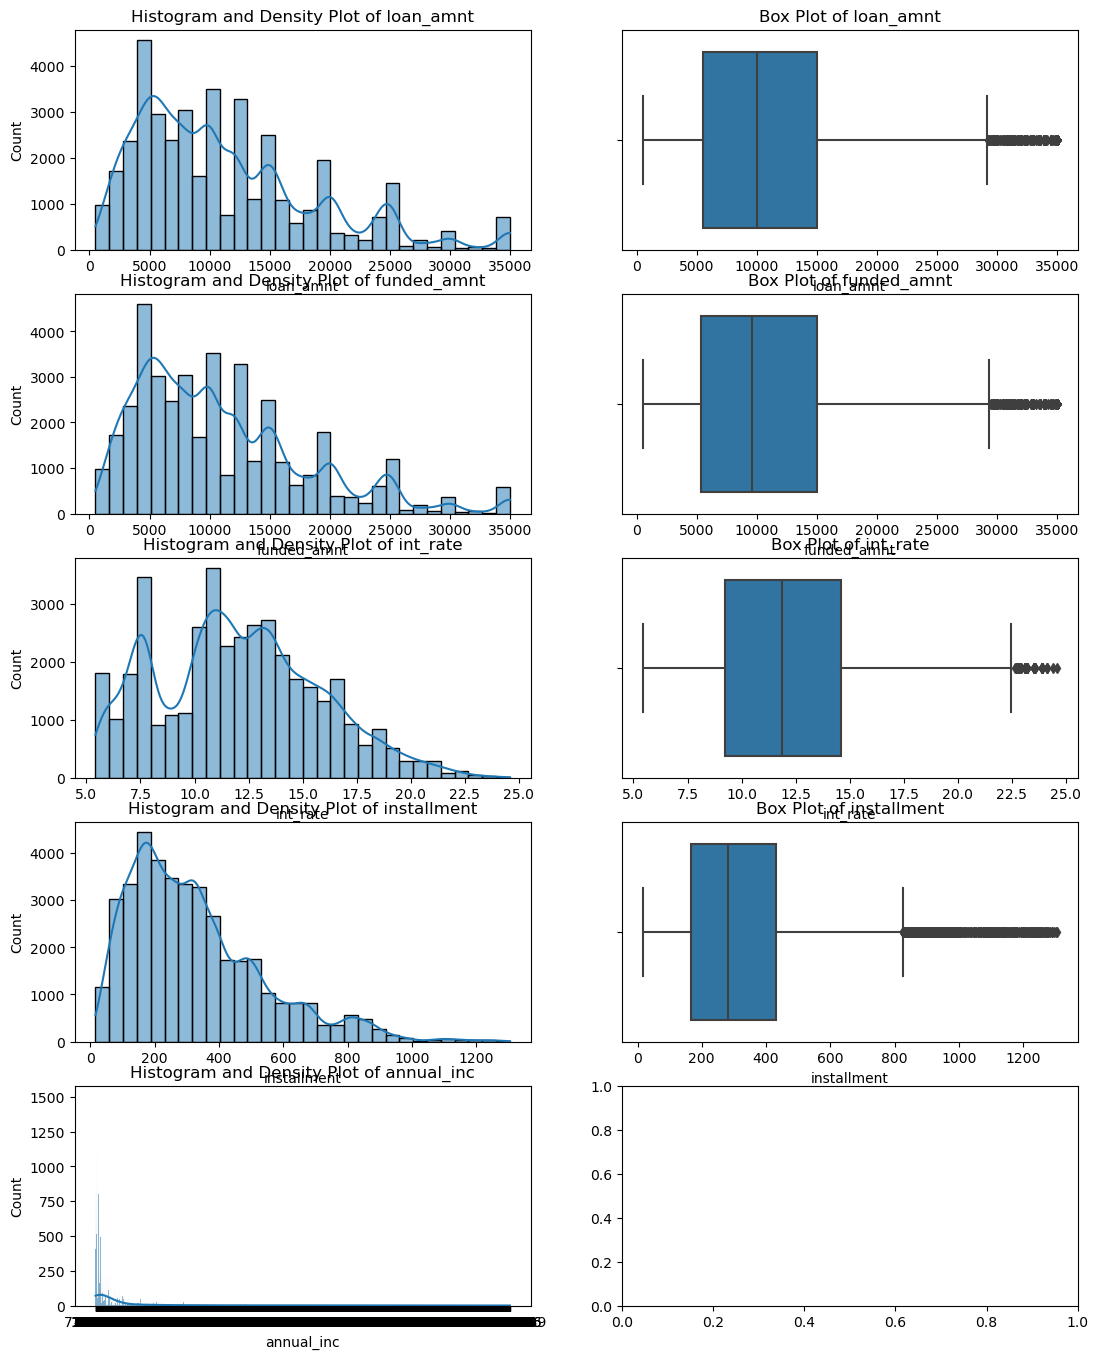

In [32]:
# Visualizations
plt.figure(figsize=(20, 20))

# Histogram and Density Plot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 3, 3 * i - 2)
    sns.histplot(loan[column], kde=True, bins=30)
    plt.title(f'Histogram and Density Plot of {column}')
    
    plt.subplot(6, 3, 3 * i - 1)
    sns.boxplot(x=loan[column])
    plt.title(f'Box Plot of {column}')
    

plt.tight_layout()
plt.show()

# Bivariate Analysis
Let's create Correlation Matrix for numerical Variables to understand how they influence each other

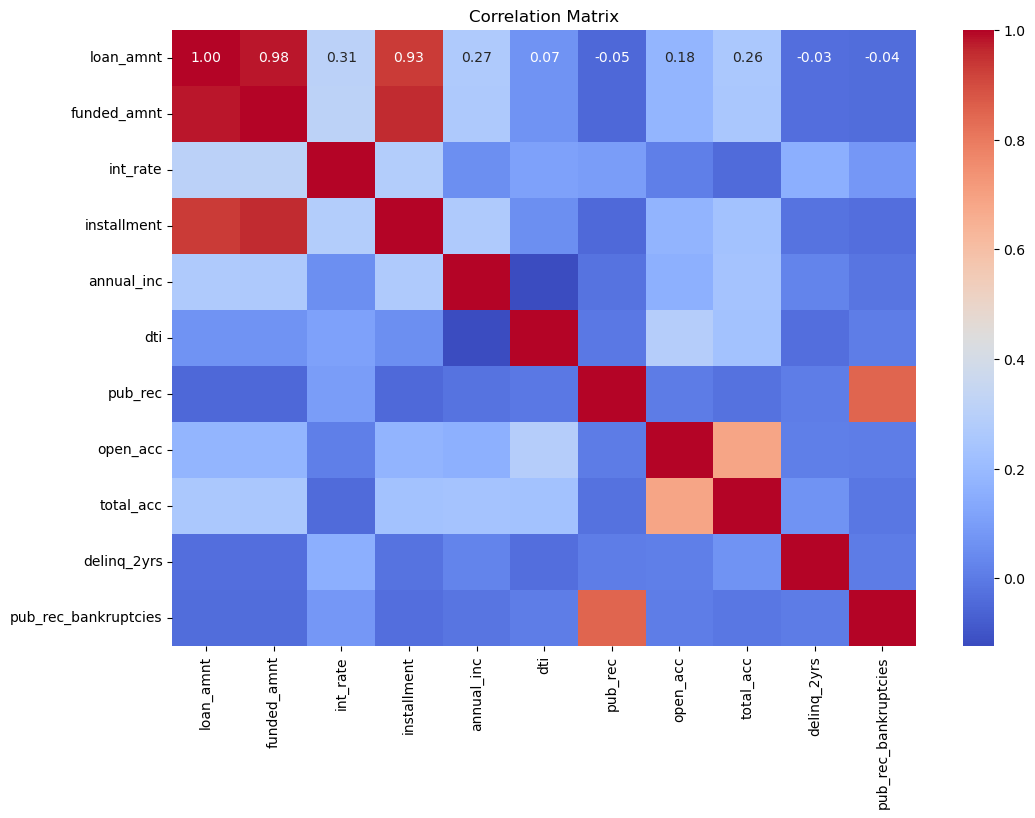

In [33]:
correlation_matrix = loan[['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
                           'pub_rec','open_acc','total_acc','delinq_2yrs','pub_rec_bankruptcies']].corr()

#print(correlation_matrix)
#Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#Observation - in below graph, we know darker the value heigher the correlation , we can clearly see loan_amnt, funded_amnt and installment have huge correlation
#These fields are proportional to each other. Next, the public records related fields pub_rec & pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

In [57]:
#Impact of Loan Amount on Loan Status
#Let's remove the Current from Loan status, as we can't use this field to analyse if applicant can be defaulted or non defaulted as loan is still ongoing
loan = loan[loan.loan_status != 'Current']


loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

As the goal of this EDA is to identify the attributes that can help in indetifying the profile as high risk - defaulted profile. These key attributes can help us - loan_amnt, term, int_rate, grade, emp_length, and loan_status.

As part of bivariate analysis, we'll focus on the relationships between these attributes and the loan_status to identify profiles that are at high risk of default.

Categorical Variables vs Loan Status:

Grade
Employment Length


In [36]:
# Defining function that cane be reused to plot categorical variables
def plot_categorical(data, feature, target):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue=target)
    plt.title(f'{feature} vs {target}')
    plt.xticks(rotation=45)
    plt.show()


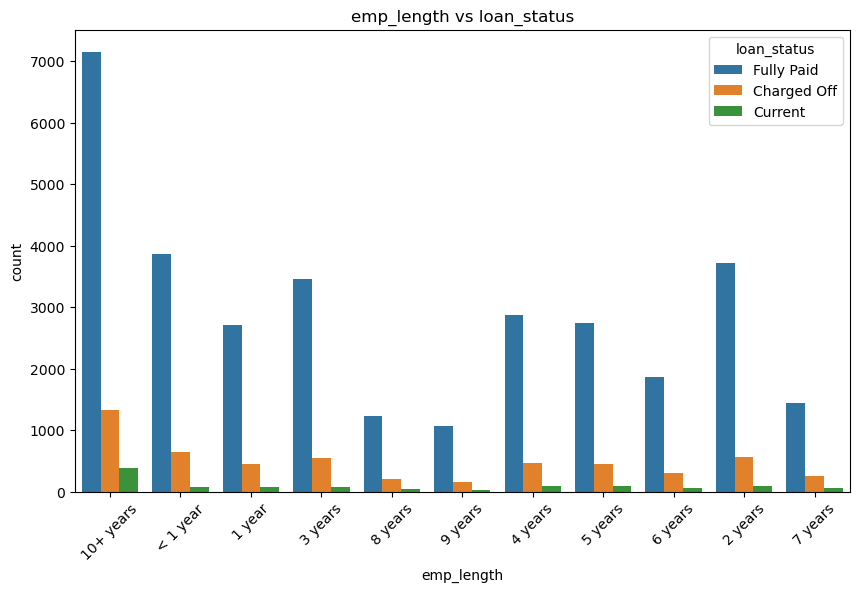

In [39]:
# Plotting categorical variable - grade vs loan_status
plot_categorical(loan, 'emp_length', 'loan_status')
#Observations
#We can see higher default rate among borrowers with shorter employment lengths (e.g., <1 year).
#Borrowers with more than 10 years of employment tend to have lower default rates.

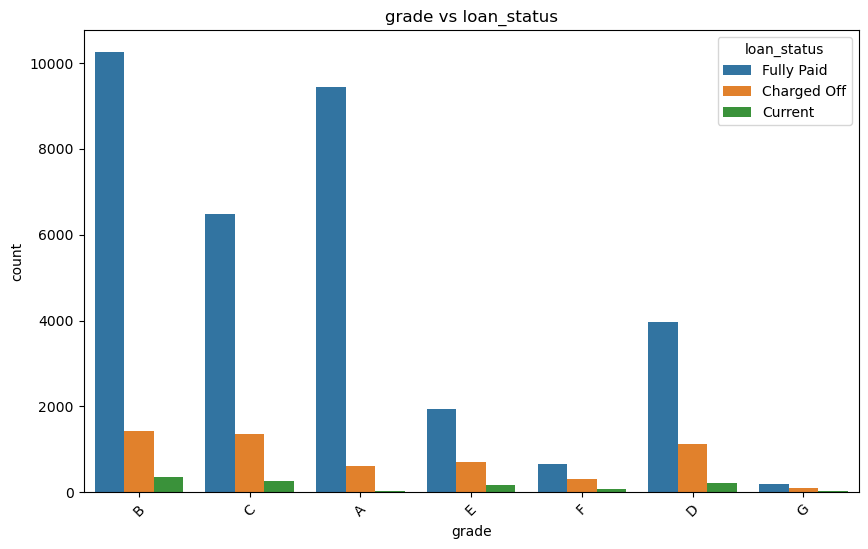

In [38]:
# Plotting categorical variable - emp_length vs loan_status
plot_categorical(loan, 'grade', 'loan_status')

#Observations
#Higher grade loans (e.g., grade 'A' and 'B') tend to have fewer defaults compared to lower grade loans (e.g., grade 'D', 'E', 'F', and 'G').
#We can say credit rating assigned to loan is significant predictor of default risk.

Numerical Variables vs Loan Status
Numerical variable that we'll consider for this bivariate analysis : loan_amnt, int_rate and installment

In [64]:
# Defining function that cane be reused to plot numerical variables
def plot_numerical(data, feature, target):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=target, y=feature)
    plt.title(f'{feature} vs {target}')
    plt.show()

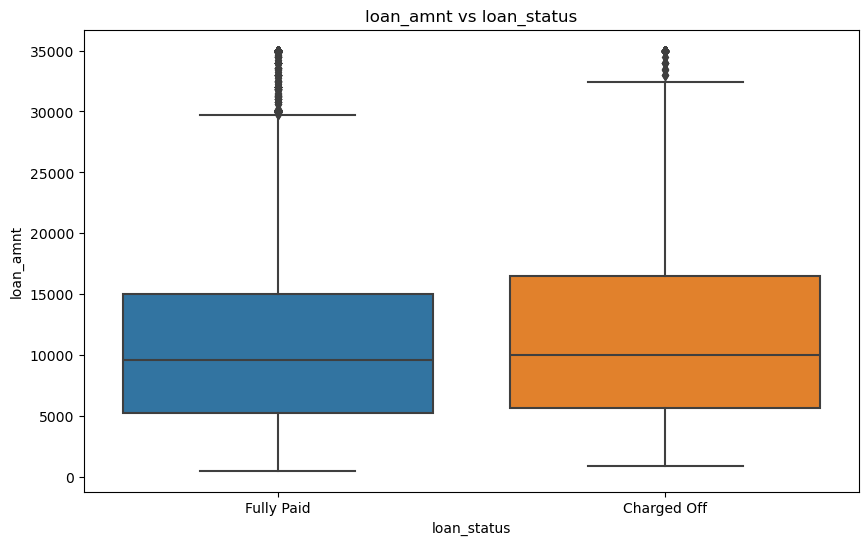

In [65]:
# Plotting numerical variable - loan_amnt vs loan_status
plot_numerical(loan, 'loan_amnt', 'loan_status')

#Observations
#The box plot indicates that higher loan amounts might be associated with a higher risk of default.
#This could imply that borrowers who take out larger loans are more likely to default.

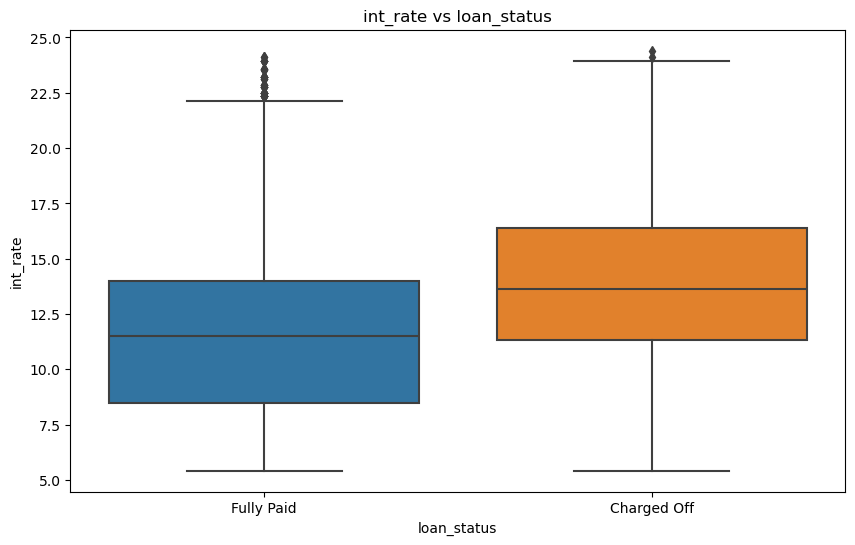

In [67]:
# Plotting numerical variable - loan_amnt vs loan_status
plot_numerical(loan, 'int_rate', 'loan_status')

#Observations
#Higher interest rates are associated with higher default rates.
#Loans with lower interest rates (indicating lower risk borrowers) have lower default rates.

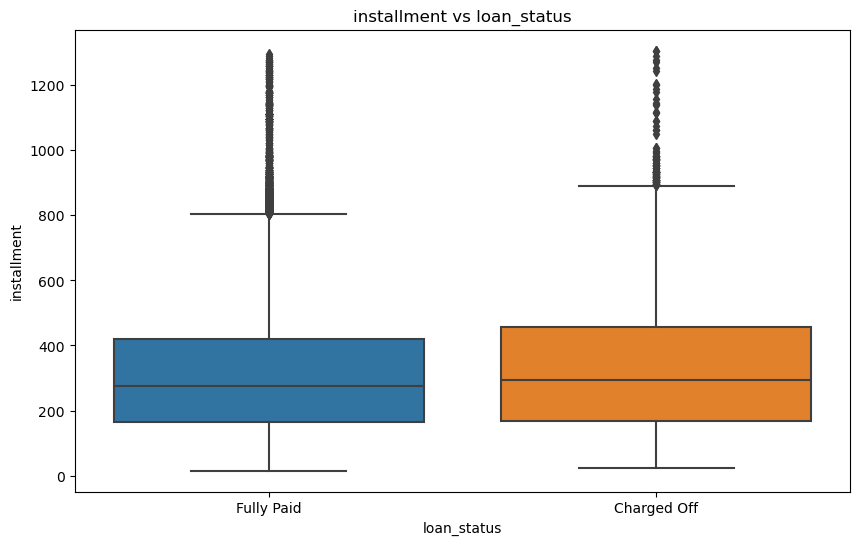

In [68]:
# Plotting numerical variable - installment vs loan_status
plot_numerical(loan, 'installment', 'loan_status')

#Observations
#Higher installment amounts are also associated with higher default rates.
#This suggests that the monthly repayment amount is a critical factor in default risk.